# LNAS Lab 2

## 0. Setup

In [193]:
from numpy import *
from matplotlib import pyplot as plt

In [194]:
# Set up pyplot
plt.rcParams['text.usetex'] = True

In [195]:
# Custom plots

def custom_plot(title="Plot", xlabel="x", ylabel="y", xlim=None, ylim=None, **kwargs):
    fig = plt.figure()
    ax = fig.subplots()

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if ylim: ax.set_ylim(*ylim)
    if xlim: ax.set_xlim(*xlim)

    ax.grid(True)
    ax.spines[['top', 'right']].set_alpha(0.3)

    return fig, ax

In [196]:
# Custom functions

def dB(x):
    return 10 * log10(abs(x))

def dB2(x):
    return 20 * log10(abs(x))

## 1.1.4. Specification masks and current responses

In [197]:
# Specification parameters

f1 = 800 # Hz
f2 = 1200 # Hz
αp = 0.5 # dB
αc = 10 # dB
αa = αc

In [198]:
# Plot parameters

fm = 1
fM = 5000
fstep = 1.01
flim = (fm, fM)
frange = linspace(fm, fm+fstep*((fM-0)//fstep), int((fM-fm)//fstep)+1)

α0 = 0
αm = 15
αlim = (α0, αm)

### Low-pass Filter

In [199]:
# Circuit parameters
C_lpf = 6.4e-6 # F
R3   = 50 # Ω
RL   = 50 # Ω

In [200]:
# Transfer function & attenuation

def H_lpf(f): # Transfer function
    return 2/(R3 *(1/R3 + 1/RL + 2j*pi*f*C_lpf))

def att_lpf(f): # Attenuation
    return -dB2(H_lpf(f))

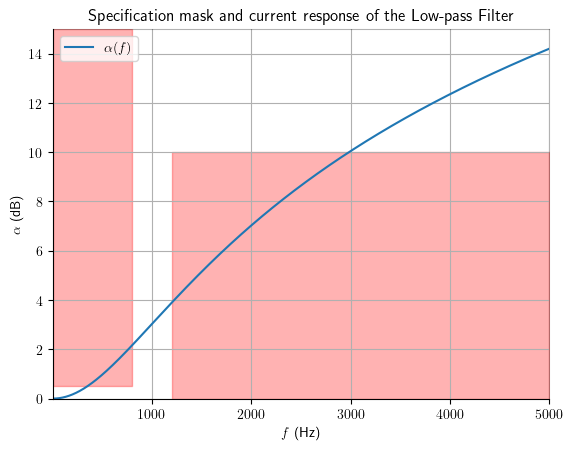

In [201]:
fig, ax = custom_plot(
    title=r'Specification mask and current response of the Low-pass Filter',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)

ax.fill_between((fm, f1), αp, αm, color='red', alpha=0.3) # Passband mask
ax.fill_between((f2, fM), αc, α0, color='red', alpha=0.3) # Stopband mask
ax.plot(frange, [att_lpf(f) for f in frange], label=r'$\alpha(f)$')
ax.legend()

fig.savefig('figures/fig1.1.4.1.svg')

### High-pass filter

In [202]:
# Circuit parameters
C_hpf = 1.6e-6 # F
R3    = 50 # Ω
RL    = 50 # Ω

In [203]:
# Transfer function & attenuation

def H_hpf(f): # Transfer function
    return 2/(1 + 1/RL * (R3 + 1/(2j*pi*f*C_hpf)))

def att_hpf(f): # Attenuation
    return -dB2(H_hpf(f))

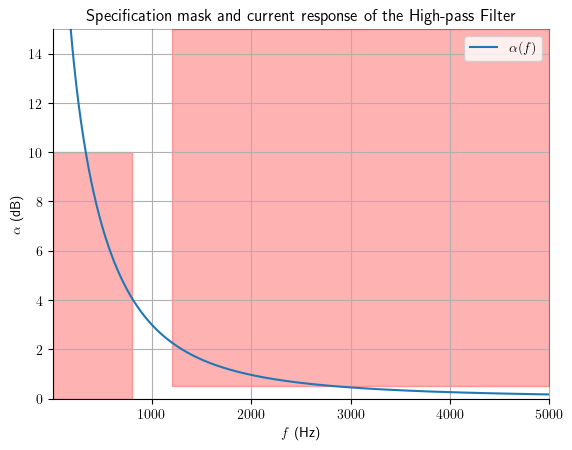

In [204]:
fig, ax = custom_plot(
    title=r'Specification mask and current response of the High-pass Filter',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)

ax.fill_between((fm, f1), αc, α0, color='red', alpha=0.3)
ax.fill_between((f2, fM), αp, αm, color='red', alpha=0.3)
ax.plot(frange, [att_hpf(f) for f in frange], label=r'$\alpha(f)$')
ax.legend()

fig.savefig('figures/fig1.1.4.2.svg')

## 1.2.4. Third Order Chebyshev Filter responses

In [205]:
# Plot parameters

fm = 1
fM = 2000
fstep = 1
flim = (fm, fM)
frange = range(fm, fM+1, fstep);
# frange = linspace(f0, f0+fstep*((fm-0)//fstep), int((fm-f0)//fstep)+1)

fticks = [f for f in frange if f % 400 == 0]

α0 = 0
αm = 15
αlim = (α0, αm)

αticks = [α for α in range(α0, αm+1, 2)]
αticks.insert(1, αp)
αlabels = [f'$\\alpha_p =$ {α}' if α == αp else f'$\\alpha_a =$ {α}' if α == αc else α for α in αticks]

### Low-pass Filter

#### Definitions

In [206]:
# Model parameters

n = 3
ε2 = 0.1220

In [207]:
# Transfer function & attenuation

def Fc_lpf3(f): # Characteristic function
    if (f < f1):
        return ε2*cos(n * arccos(f/f1))**2
    return ε2*cosh(n * arccosh(f/f1))**2

def H_lpf3(f): # Transfer function
    return sqrt(1/(1 + Fc_lpf3(f)))

def att_lpf3(f): # Attenuation
    return -dB2(H_lpf3(f))

#### Plotting

In [208]:
fig, ax = custom_plot(
    title=r'Specification mask and response of both Low-pass Filters',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)
ax.set_xticks(
    fticks,
    [f'$f_p =$ {f}' if f == f1 else f'$f_a =$ {f}' if f == f2 else f for f in fticks]
)
ax.set_yticks(αticks, αlabels)

ax.fill_between((fm, f1), αp, αm, color='red', alpha=0.3) # Passband mask
ax.fill_between((f2, fM), αc, α0, color='red', alpha=0.3) # Stopband mask
ax.plot(frange, [att_lpf(f) for f in frange], label=r'$\alpha(f)$ of initial LPF', color='blue')
ax.plot(frange, [att_lpf3(f) for f in frange], label=r'$\alpha(f)$ of Third-order LPF', color='green')
ax.legend()

fig.savefig('figures/fig1.2.4.1.svg')

### High-pass filter

#### Definitions

In [ ]:
# Model parameters

n = 3
ε2 = 0.1220
f02 = f1*f2

In [ ]:
# Transfer function & attenuation

def Fc_hpf3(f):
    return Fc_lpf3(f02/f)

def H_hpf3(f): # Transfer function
    return sqrt(1/(1 + Fc_hpf3(f)))

def att_hpf3(f): # Attenuation
    return -dB2(H_hpf3(f))

#### Plotting

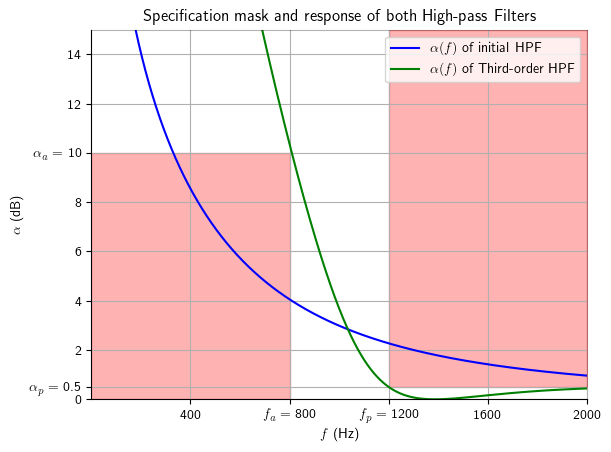

In [ ]:
fig, ax = custom_plot(
    title=r'Specification mask and response of both High-pass Filters',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)
ax.set_xticks(
    fticks,
    [f'$f_a =$ {f}' if f == f1 else f'$f_p =$ {f}' if f == f2 else f for f in fticks]
)
ax.set_yticks(αticks, αlabels)

ax.fill_between((fm, f1), αc, α0, color='red', alpha=0.3)
ax.fill_between((f2, fM), αp, αm, color='red', alpha=0.3)
ax.plot(frange, [att_hpf(f) for f in frange], label=r'$\alpha(f)$ of initial HPF', color='blue')
ax.plot(frange, [att_hpf3(f) for f in frange], label=r'$\alpha(f)$ of Third-order HPF', color='green')
ax.legend()

fig.savefig('figures/fig1.2.4.2.svg')

## 1.2.5. Simulated data measurements

In [ ]:
# Plot parameters

fm = 1
fM = 2000
fstep = 1
flim = (fm, fM)
frange = range(fm, fM+1, fstep);
# frange = linspace(f0, f0+fstep*((fm-0)//fstep), int((fm-f0)//fstep)+1)

fticks = [f for f in frange if f % 400 == 0]

α0 = 0
αm = 16
αlim = (α0, αm)

αticks = [α for α in range(α0, αm+1, 2)]
αticks.insert(1, αp)
αlabels = [f'$\\alpha_p =$ {α}' if α == αp else f'$\\alpha_a =$ {α}' if α == αc else α for α in αticks]

In [ ]:
Pmax = 1 / (8*RL)

### Low-pass Filter

#### Measurements

In [ ]:
# Measured power levels

P_lpf = {
    200: 2.3694e-3,
    400: 2.22898e-3,
    700: 2.49789e-3,
    800: 2.22751e-3,
    1000: 830.066874e-6,
    1200: 229.5011e-6,
    1400: 75.75083e-6
}

In [ ]:
# Attenuation levels

α_lpf = {f: -dB(P/Pmax) for f, P in P_lpf.items()}
print(
    '| $f$ (Hz) | $P (W)$ | $α$ (dB) |\n' + 
    '| :---: | :---: | :---: |\n' + 
    '\n'.join([f'| ${f:.1f}$ | ${(P*1e3) if P > 1e-3 else P*1e6:{".3f" if P>1e-3 else ".2f"}} \\text{{ {"m" if P>1e-3 else "μ"}W}}$ | ${α:.2f}$ |'
    for f, P, α in zip(P_lpf.keys(), P_lpf.values(), α_lpf.values())])
)
x = zip(P_lpf.keys(), P_lpf.values(), α_lpf.values())

| $f$ (Hz) | $P (W)$ | $α$ (dB) |
| :---: | :---: | :---: |
| $200.0$ | $2.369 \text{ mW}$ | $0.23$ |
| $400.0$ | $2.229 \text{ mW}$ | $0.50$ |
| $700.0$ | $2.498 \text{ mW}$ | $0.00$ |
| $800.0$ | $2.228 \text{ mW}$ | $0.50$ |
| $1000.0$ | $830.07 \text{ μW}$ | $4.79$ |
| $1200.0$ | $229.50 \text{ μW}$ | $10.37$ |
| $1400.0$ | $75.75 \text{ μW}$ | $15.19$ |


#### Plotting

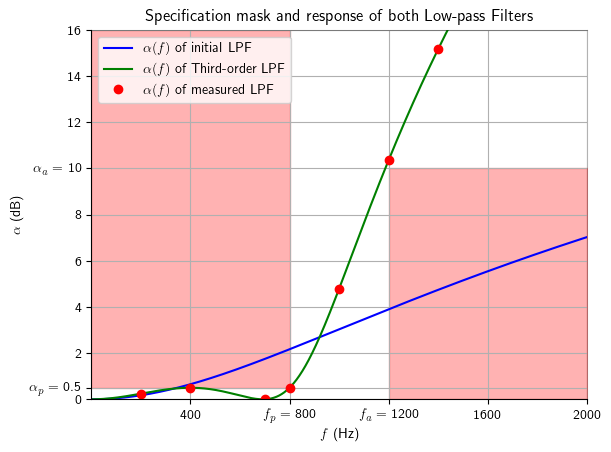

In [ ]:
fig, ax = custom_plot(
    title=r'Specification mask and response of both Low-pass Filters',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)
ax.set_xticks(
    fticks,
    [f'$f_p =$ {f}' if f == f1 else f'$f_a =$ {f}' if f == f2 else f for f in fticks]
)
ax.set_yticks(αticks, αlabels)

ax.fill_between((fm, f1), αp, αm, color='red', alpha=0.3) # Passband mask
ax.fill_between((f2, fM), αc, α0, color='red', alpha=0.3) # Stopband mask
ax.plot(frange, [att_lpf(f) for f in frange], label=r'$\alpha(f)$ of initial LPF', color='blue')
ax.plot(frange, [att_lpf3(f) for f in frange], label=r'$\alpha(f)$ of Third-order LPF', color='green')
ax.plot(P_lpf.keys(), α_lpf.values(), 'o', label=r'$\alpha(f)$ of measured LPF', color='red')
ax.legend()

fig.savefig('figures/fig1.2.5.2.svg')

### High-pass filter

#### Measurements

In [ ]:
# Measured power levels

P_hpf = {
    700: 87.70286e-6,
    800: 229.78214e-6,
    1000: 1.06826e-3,
    1200: 2.22702e-3,
    1400: 2.49726e-3,
    1600: 2.40666e-3,
    2000: 2.26063e-3,
}

In [ ]:
# Attenuation levels

α_hpf = {f: -dB(P/Pmax) for f, P in P_hpf.items()}
print(
    '| $f$ (Hz) | $P (W)$ | $α$ (dB) |\n' + 
    '| :---: | :---: | :---: |\n' + 
    '\n'.join([f'| ${f:.1f}$ | ${(P*1e3) if P > 1e-3 else P*1e6:{".3f" if P>1e-3 else ".2f"}} \\text{{ {"m" if P>1e-3 else "μ"}W}}$ | ${α:.2f}$ |'
    for f, P, α in zip(P_hpf.keys(), P_hpf.values(), α_hpf.values())])
)
x = zip(P_hpf.keys(), P_hpf.values(), α_hpf.values())

| $f$ (Hz) | $P (W)$ | $α$ (dB) |
| :---: | :---: | :---: |
| $700.0$ | $87.70 \text{ μW}$ | $14.55$ |
| $800.0$ | $229.78 \text{ μW}$ | $10.37$ |
| $1000.0$ | $1.068 \text{ mW}$ | $3.69$ |
| $1200.0$ | $2.227 \text{ mW}$ | $0.50$ |
| $1400.0$ | $2.497 \text{ mW}$ | $0.00$ |
| $1600.0$ | $2.407 \text{ mW}$ | $0.17$ |
| $2000.0$ | $2.261 \text{ mW}$ | $0.44$ |


#### Plotting

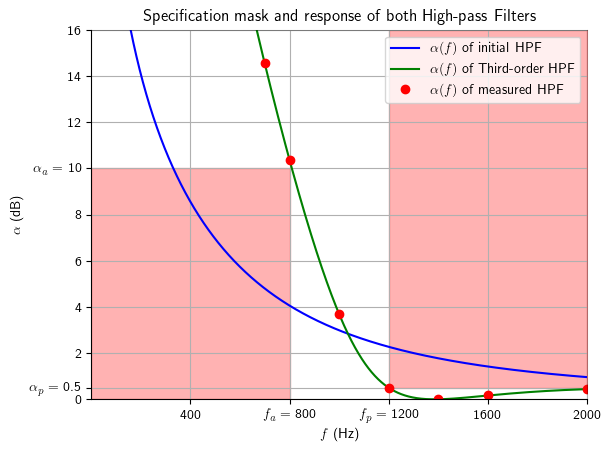

In [ ]:
fig, ax = custom_plot(
    title=r'Specification mask and response of both High-pass Filters',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)
ax.set_xticks(
    fticks,
    [f'$f_a =$ {f}' if f == f1 else f'$f_p =$ {f}' if f == f2 else f for f in fticks]
)
ax.set_yticks(αticks, αlabels)

ax.fill_between((fm, f1), αc, α0, color='red', alpha=0.3)
ax.fill_between((f2, fM), αp, αm, color='red', alpha=0.3)
ax.plot(frange, [att_hpf(f) for f in frange], label=r'$\alpha(f)$ of initial HPF', color='blue')
ax.plot(frange, [att_hpf3(f) for f in frange], label=r'$\alpha(f)$ of Third-order HPF', color='green')
ax.plot(P_hpf.keys(), α_hpf.values(), 'o', label=r'$\alpha(f)$ of measured HPF', color='red')
ax.legend()

fig.savefig('figures/fig1.2.5.4.svg')